In [9]:
# A d dimensional Vector Class

class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"


vec = Vector(7)
str(vec)


'<[0, 0, 0, 0, 0, 0, 0]>'

In [9]:
# Here is an example for an iterator

class SequenceIterator():
    """An iterator for any Python sequence type"""
    def __init__(self, sequence):
        """Make an iterator for the given sequence
        """
        self._seq = sequence  # keep a reference to underlying data
        self._k = -1    # will increment when there is a call for next()

    def __next__(self,):
        """Return the next element or else raise StopIteration"""
        self._k += 1
        if self._k < len(self._seq):
            return (self._seq[self._k])
        else:
            raise StopIteration()

    def __iter__(self,):
        """By convention, iterators return themselves as an iterator"""
        return self        


seq = SequenceIterator([1,2,3,4,5])

print(next(seq))
print(next(seq))
print(next(seq))
print(next(seq))
print(next(seq))
# print(next(seq)) --------- This will raise StopIteration

1
2
3
4
5


In [22]:
class Range:
    """A class that mimics the built in range class"""

    def __init__(self, start, stop  = None, step = 1):
        """Initialize a Range instance"""
        if step == 0:
            raise ValueError("Step cannot be zero")
        
        # Special case of range(n) - treated like range(0,n) 
        if stop is None:
            start ,stop = 0, start

        self._length = max(0 , (stop - start + step - 1) // step)

        # need knowledge about start and step
        # to support getitem

        self._start = start
        self._step = step

    def __len__(self):
        """Return the number of elements in the range"""
        return self._length

    def __getitem__(self, k):
        """Return element at index k"""
        
        # Convert negative index
        if k < 0:
            k += len(self)

        if not 0 <= k <= self._length:
            raise IndexError("Index out of range")

        return self._start + k * self._step


ran = Range(3,6,1)
print(f"{[elem for elem in ran]}")

print(f"Or simply get an item as, ran[index]: {ran[2]}")



[3, 4, 5, 6]
Or simply get an item as, ran[index]: 5


In [24]:
# Here is an example of Inheritance 
# We use super() to initialize from the parent class
# and add the extension we want

class CreditCard:
    """A consumer credit card"""
    def __init__(self, customer, bank, acnt, limit):
        """Initalize a new credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        """

        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank   

    def get_account(self):
        return self._acnt  

    def get_limit(self):
        return self._limit

    def get_balance(self): 
        return self._balance    

    def charge(self,price):
        """Charge given price to the card, assuming sufficient limit
        
        Returns True if the charge was successful, False otherwise"""

        if price + self._balance > self._limit:
            print("Insufficient Limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        self._balance -= amount



class DangerousCreditCard(CreditCard):
    """ An extention to the Credit Card that has compound interest and fees
    
    """
    def __init__(self,customer,bank,acnt,limit, apr):
        """Initalize a new Dangerous credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        apr                 the annual percentage rate      eg. 0.0825 for %8.25 APR  
        """
        super().__init__(customer,bank,acnt,limit)
        self._apr = apr

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if charge was processed.
        Return False and assess 5 fee if charge is denied.
        """
        success = super().charge(price)
        if not success:
            self._balance -= 5
        
        return success
        
    def process_month(self):
        """Asses monthly interest on outstanding balance"""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly_factor

In [4]:
# here is an another example of inheritance based on some iterators

#              ---- > ArithmeticProgression
#              |
# Progression -
#              |
#              ---- > GeometricProgression


class Progression:
    """Iterator producing a generic progression
    
    Default iterator produces the whole numbers 0,1,2
    """

    def __init__(self, start =0) -> None:
        """ Initialize current to the first value of progression.
        """
        self._current = start

    def _advance(self):
        """ Update self._current to a new value.
        This should be overridden by subclasses.
        By convention, if current is set to None, this designates the 
        end of a finite progression.
        """
        self._current += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance() 
            return answer

    def __iter__(self):
        """By convention, an iterator should return itself."""
        return self

    def print_progression(self, n : int):
        """Print next n values of the progression"""
        print(" ".join(str(next(self)) for j in range(n)))

class ArithmeticProgression(Progression):
    """Iterator for arithmetic progression"""
    def __init__(self,increment = 1, start = 0) -> None:
        """Make an new ArithmeticProgression
        
        increment - increment the fixed constant to add to each term
        start - the fixed term of the progression
        """
        
        super().__init__(start)
        self._increment = increment

    # Override inherited version
    def _advance(self):
        """Update current value by adding the fixed increment"""
        self._current += self._increment

class GeometricProgression(Progression):
    """Iterator producing geometric progression"""
    def __init__(self, base = 2, start=1) -> None:
        """ Create a new geometric progression.

        base            the fixed constant multiplied to each term (default 2)
        start           the first term of the progression (default 1)

        """
        super().__init__(start)
        self._base = base

    def _advance(self):
        """Update current value by multiplying it by base"""
        self._current *= self._base

class FibonacciProgression(Progression):
    """Iterator producing Fibonacci progression"""

    def __init__(self, first= 0, second=1) -> None:
        """Create a new fibonacci progression.
        first                   the first term of the progression (default 0)
        second                  the second term of the progression (default 1)
        """       
        super().__init__(first)
        self._prev = second - first

    def _advance(self):
        """Update current value by taking sum of previous two."""
        self._prev, self._current = self._current, self._prev + self._current

if __name__ == "__main__" :
    print( "Default progression:" )
    Progression().print_progression(10)
    print( "Arithmetic progression with increment 5:" )
    ArithmeticProgression(increment = 5).print_progression(10)
    print( "Arithmetic progression with increment 5 and start 2:" )
    ArithmeticProgression(increment = 5, start = 2).print_progression(10)
    print( "Geometric progression with default base:" )
    GeometricProgression().print_progression(10)
    print( "Geometric progression with base 3:" )
    GeometricProgression(3).print_progression(10)
    print( "Fibonacci progression with default start values:" )
    FibonacciProgression().print_progression(10)
    print( "Fibonacci progression with start values 4 and 6:" )
    FibonacciProgression(4, 6).print_progression(10)
    

Default progression:
0 1 2 3 4 5 6 7 8 9
Arithmetic progression with increment 5:
0 5 10 15 20 25 30 35 40 45
Arithmetic progression with increment 5 and start 2:
2 7 12 17 22 27 32 37 42 47
Geometric progression with default base:
1 2 4 8 16 32 64 128 256 512
Geometric progression with base 3:
1 3 9 27 81 243 729 2187 6561 19683
Fibonacci progression with default start values:
0 1 1 2 3 5 8 13 21 34
Fibonacci progression with start values 4 and 6:
4 6 10 16 26 42 68 110 178 288


## THE EXERSICES

In [3]:
# R-2.1 Give three examples of life-critical software applications.

# Life-critical software applications are those applications whose failure could result in loss of
#  human life or catastrophic consequences. Here are three examples of such applications:

# Medical Devices:
#  Medical devices such as pacemakers, ventilators, and insulin pumps are
#  critical to the health and well-being of patients. Any failure or malfunction
#  of these devices could lead to serious health complications or even death.

# Air Traffic Control Systems:
#  Air traffic control systems are responsible for the safe navigation of airplanes in the
#  skies. Any failure in these systems could result in a collision between
#  planes, which could have catastrophic consequences.

# Nuclear Power Plant Control Systems: Nuclear power plant control systems are
#  critical to the safe operation of nuclear power plants. Any failure in
#  these systems could result in a nuclear meltdown, which could have devastating 
# consequences for the surrounding environment and people's health.




In [4]:
# R-2.2 
# Give an example of a software application in which adaptability can mean
# the difference between a prolonged lifetime of sales and bankruptcy.

# Getting feedback from customers always. How they are using the software
# What do they like what do they spent the most time on.
# Using these metrics, improve UX.

# LLM thinks its:
# The technology and features of web browsers are constantly evolving, and users
#  have a wide range of options to choose from. A browser that fails to adapt to
#  changing technology and user needs will quickly become outdated and unpopular, leading
#  to a decrease in market share and revenue.

# For example, Internet Explorer was once the dominant browser, but its failure
#  to adapt to the rapid changes in web technology and lack of support for modern features
#  led to its decline in popularity and eventual discontinuation. In contrast, Google Chrome
#  has been successful in maintaining a large market share by constantly adapting to
#  changing technology, introducing new features, and providing a seamless user experience. The
#  adaptability of Chrome has helped it to
#  remain competitive in a crowded market and avoid bankruptcy.

In [5]:
# R-2.3 
# Describe a component from a text-editor GUI and the methods that it encapsulates.

# An example can be a title bar.

# show_filename() this method shows the current filename thats being displayed
# minimize_window() this method will execute the minimization when user clicks on the minimize button
# close_window() this method will close the window, maybe the application

# LLM thinks that

# A common component of a text-editor GUI is a menu bar, which typically contains a
#  set of menus that provide various options for the user to interact with the application.
#  Here are some methods that a menu bar component might encapsulate:

# addMenu(menuLabel): This method adds a new menu to the menu bar with the specified label.

# removeMenu(menuLabel): This method removes the menu with the specified label from the menu bar.

# addMenuItem(menuLabel, itemLabel, action): This method adds a new menu item to
#  the menu with the specified label. The menu item will display the label and perform the specified action when clicked.

# removeMenuItem(menuLabel, itemLabel): This method removes the menu item with
#  the specified label from the menu with the specified menu label.

# setEnabled(menuLabel, itemLabel, enabled): This method enables or disables the menu item
#  with the specified label in the menu with the specified menu label.

# setChecked(menuLabel, itemLabel, checked): This method checks or unchecks the menu item with
#  the specified label in the menu with the specified menu label.

# These methods provide a way for the text-editor GUI to create and manipulate menus
#  and menu items dynamically, allowing the user to interact with the application in a flexible and customizable way.

In [6]:
# R-2.4 
# Write a Python class, Flower, that has three instance variables of type str,
# int, and float, that respectively represent the name of the flower, its number
#  of petals, and its price. Your class must include a constructor method
# that initializes each variable to an appropriate value, and your class should
# include methods for setting the value of each type, and retrieving the value
# of each type.

class Flower:
    """ A flower class"""
    def __init__(self,name, num_petals, price):
        self._name = name
        self._num_petals = num_petals
        self._price = price

    def set_name(self, name: str):
        self._name = name

    def set_num_petals(self, num_petals: int):
        self._num_petals = num_petals

    def set_price(self, price: float):
        self._price = price

    def get_name(self) -> str:
        return self._name

    def get_num_petals(self) -> int:
        return self._num_petals

    def get_price(self) -> float:
        return self._price



In [1]:
# R-2.5 
# Use the techniques of Section 1.7 to revise the charge and make payment
# methods of the CreditCard class to ensure that the caller sends a number
# as a parameter

# 1.7 is exception handling
# Just basically making sure that the methods get numbers


class CreditCard:
    """A consumer credit card"""
    def __init__(self, customer, bank, acnt, limit):
        """Initalize a new credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        """

        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank   

    def get_account(self):
        return self._acnt  

    def get_limit(self):
        return self._limit

    def get_balance(self): 
        return self._balance    

    def charge(self,price):
        """Charge given price to the card, assuming sufficient limit
        
        Returns True if the charge was successful, False otherwise"""

        assert isinstance(price, (int, float)), "price must be a number"


        if price + self._balance > self._limit:
            print("Insufficient Limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        assert isinstance(amount, (int, float)), "amount must be a number"
        self._balance -= amount



In [2]:
# R-2.6
#  If the parameter to the make payment method of the CreditCard class
# were a negative number, that would have the effect of raising the balance
# on the account. Revise the implementation so that it raises a ValueError if
# a negative value is sent.

class CreditCard:
    """A consumer credit card"""

    def __init__(self, customer: str, bank: str, account_number: str, credit_limit: float) -> None:
        """Initialize a new credit card with zero balance."""

        self._customer = customer
        self._bank = bank
        self._account_number = account_number
        self._credit_limit = credit_limit
        self._balance = 0

    def get_customer(self) -> str:
        """Return the name of the customer."""

        return self._customer

    def get_bank(self) -> str:
        """Return the name of the bank."""

        return self._bank

    def get_account_number(self) -> str:
        """Return the account identifier number."""

        return self._account_number

    def get_credit_limit(self) -> float:
        """Return the credit limit."""

        return self._credit_limit

    def get_balance(self) -> float:
        """Return the total debt of the card."""

        return self._balance

    def charge(self, price: float) -> bool:
        """Charge the given price to the card, assuming sufficient limit."""

        assert isinstance(price, (int, float)), "price must be a number"

        if price + self._balance > self._credit_limit:
            print("Insufficient limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount: float) -> None:
        """Make a payment on the card."""

        assert isinstance(amount, (int, float)), "amount must be a number"
        if amount < 0:
            raise ValueError("amount must be positive")
        self._balance -= amount

    def __str__(self) -> str:
        """Return a string representation of the card."""

        return f"Customer: {self._customer}\nBank: {self._bank}\nAccount Number: {self._account_number}\nCredit \
         Limit: {self._credit_limit}\nBalance: {self._balance}"


In [1]:
# R-2.7 
# The CreditCard class of Section 2.3 initializes the balance of a
#  new account to zero. Modify that class so that a new account can be given a
# nonzero balance using an optional fifth parameter to the constructor. The
# four-parameter constructor syntax should continue to produce an account
# with zero balance.

class CreditCard:
    """A consumer credit card"""
    def __init__(self, customer, bank, acnt, limit, balance  = 0):
        """Initalize a new credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        """

        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = balance

    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank   

    def get_account(self):
        return self._acnt  

    def get_limit(self):
        return self._limit

    def get_balance(self): 
        return self._balance    

    def charge(self,price):
        """Charge given price to the card, assuming sufficient limit
        
        Returns True if the charge was successful, False otherwise"""

        assert isinstance(price, (int, float)), "price must be a number"


        if price + self._balance > self._limit:
            print("Insufficient Limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        if amount < 0 :
            raise ValueError("amount must be positive")
        assert isinstance(amount, (int, float)), "amount must be a number"
        self._balance -= amount

my_card = CreditCard("Joe", "American Express", "1234 1234 1234 1234", 700, 100)


In [20]:
# R-2.8
#  Modify the declaration of the first for loop in the CreditCard tests, from
# Code Fragment 2.3, so that it will eventually cause exactly one of the three
# credit cards to go over its credit limit. Which credit card is it?


# Class

class CreditCard:
    """A consumer credit card"""
    def __init__(self, customer, bank, acnt, limit, balance  = 0):
        """Initalize a new credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        """

        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = balance

    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank   

    def get_account(self):
        return self._acnt  

    def get_limit(self):
        return self._limit

    def get_balance(self): 
        return self._balance    

    def charge(self,price):
        """Charge given price to the card, assuming sufficient limit
        
        Returns True if the charge was successful, False otherwise"""

        assert isinstance(price, (int, float)), "price must be a number"


        if price + self._balance > self._limit:
            print("Insufficient Limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        if amount < 0 :
            raise ValueError("amount must be positive")
        assert isinstance(amount, (int, float)), "amount must be a number"
        self._balance -= amount

        

# Original

'''
if __name__ == "__main__":
    wallet = [ ]
    wallet.append(CreditCard( "John Bowman" , "California Savings" , "5391 0375 9387 5309" , 2500) )
    wallet.append(CreditCard( "John Bowman" , "California Federal" , "3485 0399 3395 1954" , 3500) )
    wallet.append(CreditCard( "John Bowman" , "California Finance" , "5391 0375 9387 5309" , 5000) )
    
    for val in range(1, 17):
        wallet[0].charge(val)
        wallet[1].charge(2 * val)
        wallet[2].charge(3  *val)
    
    for c in range(3):
        print( "Customer = ", wallet[c].get_customer())
        print( "Bank =" , wallet[c].get_bank())
        print( "Account =" , wallet[c].get_account())
        print( "Limit = ", wallet[c].get_limit())
        print( "Balance =" , wallet[c].get_balance())
        while wallet[c].get_balance( ) > 100:
            wallet[c].make_payment(100)
            print("New balance =" , wallet[c].get_balance())
        print()
'''


# Original
if __name__ == "__main__":
    wallet = [ ]
    wallet.append(CreditCard( "John Bowman" , "California Savings" , "5391 0375 9387 5309" , 2500) )
    wallet.append(CreditCard( "John Bowman" , "California Federal" , "3485 0399 3395 1954" , 3500) )
    wallet.append(CreditCard( "John Bowman" , "California Finance" , "5391 0375 9387 5309" , 5000) )
    
    for val in range(1, 59):
        wallet[0].charge(val)
        wallet[1].charge(2 * val)
        wallet[2].charge(3  *val)

    print(wallet[0].get_balance())
    print(wallet[1].get_balance())
    print(wallet[2].get_balance())
    
    # for c in range(3):
    #     print( "Customer = ", wallet[c].get_customer())
    #     print( "Bank =" , wallet[c].get_bank())
    #     print( "Account =" , wallet[c].get_account())
    #     print( "Limit = ", wallet[c].get_limit())
    #     print( "Balance =" , wallet[c].get_balance())
    #     while wallet[c].get_balance( ) > 100:
    #         wallet[c].make_payment(100)
    #         print("New balance =" , wallet[c].get_balance())
    #     print()

# So the first card is the first one that goes over its limit 

Insufficient Limit
1711
3422
4959


In [25]:
# R-2.9 
# Implement the sub method for the Vector class of Section 2.3.3, so
# that the expression u−v returns a new vector instance representing the
# difference between two vectors.


class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"

    def __repr__(self) -> str:
        """ Will be used for debugging and development
        String representation for the vector for the people who code"""
        return f"A vector with coordinates {self._coords[:]}"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

my_vect = Vector(5)
second_vec = Vector(5)

my_vect[3] = 4
second_vec[4] = 7

result = my_vect - second_vec
print(result)

<[0, 0, 0, 4, -7]>


In [3]:
# R-2.10
#  Implement the __neg__ method for the Vector class of Section 2.3.3, so
# that the expression −v returns a new vector instance whose coordinates
# are all the negated values of the respective coordinates of v.


class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated, my solution
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # LLM - PRO solution
    def __neg__(self,):
        return Vector(-self[i] for i in range(len(self)))




my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 2 , 3 , 4

print(-my_vect)

# Chech if addition works
v = my_vect + [5, 3, 10, -2, 1]

print(v)

# how abour right addition
v_r = [5, 3, 10, -2, 1] + my_vect

# TypeError: can only concatenate list (not "Vector") to list

<[0, 0, -4, -2, -3]>


TypeError: can only concatenate list (not "Vector") to list

In [4]:
# R-2.11
#  In Section 2.3.3, we note that our Vector class supports a syntax such as
# v = u + [5, 3, 10, −2, 1], in which the sum of a vector and list returns
# a new vector. However, the syntax v = [5, 3, 10, −2, 1] + u is illegal.
# Explain how the Vector class definition can be revised so that this syntax
# generates a new vector.


class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 2 , 3 , 4

# how abour right addition
right_added_vec = [5, 3, 10, -2, 1] + my_vect

print(right_added_vec)


<[5, 3, 14, 0, 4]>


In [10]:
# R-2.12 
# Implement the mul method for the Vector class of Section 2.3.3, so
# that the expression v * 3 returns a new vector with coordinates that are 3
# times the respective coordinates of v.



class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __mul__(self,weight):
        """Multipy all the elements of a vector by weight"""
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] * weight 
        return result


my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 2 , 3 , 4

print(my_vect * 3)

<[0, 0, 12, 6, 9]>


In [13]:
# R-2.13 
# Exercise R-2.12 asks for an implementation of mul , for the Vector
# class of Section 2.3.3, to provide support for the syntax v 3. Implement
# the rmul method, to provide additional support for syntax 3 v.




class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords[:]) + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    # multiplication
    def __mul__(self,weight):
        """Multipy all the elements of a vector by weight"""
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] * weight 
        return result

    # right multiplication
    def __rmul__(self,weight):
        """Multiply the vector from right side"""
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = weight * self[i]
        return result

my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 2 , 3 , 4

print(4 * my_vect)

<[0, 0, 16, 8, 12]>


In [7]:
# R-2.14 
# Implement the mul method for the Vector class of Section 2.3.3, so
# that the expression u * v returns a scalar that represents the dot product of
# the vectors, that is, ∑di=1 ui · vi.


class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords)[:] + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    # Define mul such that it can do both jobs
    # Weighting a vector or dot product of two vectors multiplication
    def __mul__(self,other):
        if isinstance(other, (int,float,)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result

        elif isinstance(other, Vector):
            if len(self) != len(other):
                raise  ValueError("Dimension mismatch")
            
            result_list = [self[i] * other[i] for i in range(len(self))]
            return sum(result_list)
        else:
            raise TypeError("Unsupported operand type(s)")

    def __rmul__(self,other):
        return self.__mul__(other)
    
    def __repr__(self):
        return str(self)

my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 2 , 3 , 4

second_vec = Vector(5)
second_vec[2], second_vec[3], second_vec[4] = 4, 5 ,6 

print(f"Weighted usage: {my_vect * 3}")

print(f"Dot Product {my_vect * second_vec}")





Weighted usage: <[0, 0, 12, 6, 9]>
Dot Product 44


In [8]:
# R-2.15 
# The Vector class of Section 2.3.3 provides a constructor that takes an integer
#  d, and produces a d-dimensional vector with all coordinates equal to 0.
#  Another convenient form for creating a new vector would be to send the
# constructor a parameter that is some iterable type representing a sequence
# of numbers, and to create a vector with dimension equal to the length of
# that sequence and coordinates equal to the sequence values. For example,
# Vector([4, 7, 5]) would produce a three-dimensional vector with 
# coordinates <4, 7, 5>. Modify the constructor so that either of these forms is
# acceptable; that is, if a single integer is sent, it produces a vector of that
# dimension with all zeros, but if a sequence of numbers is provided, it produces
#  a vector with coordinates based on that sequence


class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        if isinstance(d, int):
            self._coords = [0] * d
        elif isinstance(d, (list, tuple)):
            self._coords  = list(d)
        else:
            raise TypeError("Cannot initialize a vector with those arguments")

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords)[:] + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    # Define mul such that it can do both jobs
    # Weighting a vector or dot product of two vectors multiplication
    def __mul__(self,other):
        if isinstance(other, (int,float,)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result

        elif isinstance(other, Vector):
            if len(self) != len(other):
                raise  ValueError("Dimension mismatch")
            
            result_list = [self[i] * other[i] for i in range(len(self))]
            return sum(result_list)
        else:
            raise TypeError("Unsupported operand type(s)")

    def __rmul__(self,other):
        return self.__mul__(other)
    
    def __repr__(self):
        return str(self)


my_vect = Vector(4)

second_vec  = Vector([1,2,3,4])

print(second_vec)

<[1, 2, 3, 4]>


In [20]:
#  R-2.16
#  Our Range class, from Section 2.3.5, relies on the formula
# max(0, (stop − start + step − 1) // step)
# to compute the number of elements in the range. It is not immediately evident
#  why this formula provides the correct calculation, even if assuming
# a positive step size. Justify this formula, in your own words.


class Range:
    """A class that mimics the built in range class"""

    def __init__(self, start, stop  = None, step = 1):
        """Initialize a Range instance"""
        if step == 0:
            raise ValueError("Step cannot be zero")
        
        # Special case of range(n) - treated like range(0,n) 
        if stop is None:
            start ,stop = 0, start


        # The number of iterations we are going to perform is determined
        # by the number of elements in the range floor divided by the step size
        self._length = max(0 , (stop - start + step - 1) // step)

        # need knowledge about start and step
        # to support getitem

        self._start = start
        self._step = step

    def __len__(self):
        """Return the number of elements in the range"""
        return self._length

    def __getitem__(self, k):
        """Return element at index k"""
        
        # Convert negative index
        if k < 0:
            k += len(self)

        if not 0 <= k <= self._length:
            raise IndexError("Index out of range")

        return self._start + k * self._step


# LLM explanation

# The formula used in the Range class to compute the number of elements in the range is:

# max(0, (stop - start + step - 1) // step)

# This formula is used to determine the number of elements in the range
#  when the range is defined with a step size. The formula works by subtracting
#  the start value from the stop value and adding the step size.
#  This gives the total distance that needs to be covered by the range.

# The result of this calculation is then divided by the step size using integer
#  division (//). This gives the number of steps required to cover the
#  range. The result of this division is then rounded up by adding step - 1 and dividing by step.
#  This is done to ensure that the range includes the stop value even
#  if the number of steps required to reach it is not a whole number.

# Finally, max(0, ...) is used to ensure that the result is
#  non-negative, even if the stop value is less than the start value.

# To see why this formula is correct, consider an example where the
#  start value is 0, the stop value is 10, and the step size is 2. Using the formula, we get:

# max(0, (10 - 0 + 2 - 1) // 2) = max(0, 5) = 5

# This result is correct, since a range with a step size of 2
#  that starts at 0 and ends at 10 includes the values 0, 2, 4, 6, 8, and 10, for
#  a total of 6 values. The formula correctly computes the number of steps required to cover the
#  range, even if the step size does not evenly divide the distance between the start and stop values.

In [27]:
# R-2.17 
# Draw a class inheritance diagram for the following set of classes:
# • Class Goat extends object and adds an instance variable tail and
# methods milk( ) and jump( ).
# • Class Pig extends object and adds an instance variable nose and
# methods eat(food) and wallow( ).
# • Class Horse extends object and adds instance variables height and
# color, and methods run( ) and jump( ).
# • Class Racer extends Horse and adds a method race( ).
#  • Class Equestrian extends Horse, adding an instance variable weight
# and methods trot( ) and is trained( ).

# Let me write the code instead

import random


# • Class Goat extends object and adds an instance variable tail and
# methods milk( ) and jump( ).
class Goat(object):
    """A Goat class that has tail and classifies the goats with respect to 
    the ability to jump and give milk"""
    def __init__(self, tail):
        self._tail = tail

    def milk(self):
        return True if random.randint(0,4) > 2 else False

    def jump(self):
        return True if random.randint(0,1) == 1 else False 


# • Class Pig extends object and adds an instance variable nose and
# methods eat(food) and wallow( ).

class Pig(object):
    """A pig class that has specific nose type and that can eat food & wallow"""
    def __init__(self,nose_type):
        self._nose_type = nose_type
        self._is_avaliable = True

    def eat(self, food):
        if not self._is_avaliable:
            return "This pig cannot eat right now"

        if food in ["food1", "food2", "food3", "food4"]:
            return "The pig can eat this food"
        else:
            return "Pigs dont eat this food"

    def wallow(self):
        self._is_avaliable = False
        return "Now, this pig is wallowing."

    def stop_wallowing(self):
        self._is_avaliable = True


# • Class Horse extends object and adds instance variables height and
# color, and methods run( ) and jump( ).
from enum import Enum

class Horse(object):
    """This is a horse class that has height and color variables and
    run and jump methods. a horse that is running may not be able to jump"""

    class Movement(Enum):
        RUN = 1
        JUMP = 2
        REST = 3

    def __init__(self, name , color, height) -> None:
        self._name = name
        self._height = height
        self._color = color
        self._movement = self.Movement.REST


    def run(self):
        self._movement = self.Movement.RUN
        return F"{self._name} is running."

    def jump(self):
        if self._movement == self.Movement.RUN:
            return f"{self._name} just jumped!"
        else:
            return f"{self._name} can only jump while running" 

    def rest(self):
        self._movement = self.Movement.REST
        return f"{self._name} is feeling rested. Now it can run or jump again"

# • Class Racer extends Horse and adds a method race( ).

class Racer(Horse):
    def __init__(self,name,color,height):
        super().__init__(name, color,height)

    def race(self):
        return f"{self._name} is ready to race! Let's go!"


#  • Class Equestrian extends Horse, adding an instance variable weight
# and methods trot( ) and is trained( ).

class Equestrian(Horse):
    def __init__(self, name, color, height) -> None:
        super().__init__(name, color, height)
        self._trained = True if random.random() < 0.5 else False    

    def trot(self,):
        return f"{self._name} is troting!"

    def trained(self):
        return f"{self._name} is a trained horse" if self._trained else f"{self._name} is not trained"


# jo = Horse("jo" ,"black", "2")
# 
# jo.jump()
# jo.rest()
# jo.run()
# jo.jump()

In [18]:
# R-2.18
#  Give a short fragment of Python code that uses the progression classes
# from Section 2.4.2 to find the 8th value of a Fibonacci progression that
# starts with 2 and 2 as its first two values.

print( "Fibonacci progression with start values 2 and 2:" )
FibonacciProgression(2, 2).print_progression(8)

iterator = FibonacciProgression(2,2)

# Printing 8th element  of Fibonacci progression(2,2)
for index, elem in enumerate(iterator):
    if index == 7:
        print(f"8th element: {elem}")
        break
    else:
        continue

Fibonacci progression with start values 2 and 2:
2 2 4 6 10 16 26 42
8th element: 42


In [23]:
# R-2.19
#  When using the ArithmeticProgression class of Section 2.4.2 with an in-
# crement of 128 and a start of 0, how many calls to next can we make
# before we reach an integer of 2**63 or larger?

# LLM thinks

# The ArithmeticProgression class in Section 2.4.2 generates an arithmetic
#  progression with a given increment and start value. If we use an increment
#  of 128 and a start value of 0, the progression will generate
#  the sequence 0, 128, 256, 384, 512, and so on.

# To determine how many calls to next we can make before we reach an
#  integer of 2**63 or larger, we need to find the largest integer
#  n such that 128*n < 2**63. We can solve for n as follows:

# 128*n < 2**63
# n < 2**56

# Therefore, we can make at most 2**56 calls to next before we reach an integer of 2**63 or larger.\

# Pretty simple


In [24]:
# R-2.20 
# What are some potential efficiency disadvantages of having very deep 
# inheritance trees, that is, a large set of classes, A, B, C, and so on, such that
# B extends A, C extends B, D extends C, etc.?

# It can be hard to follow a superclass hierarchy to the root

# LLM

# Having a deep inheritance tree can result in several potential efficiency disadvantages:

# Increased complexity and maintenance cost: As the number of classes in the hierarchy
#  increases, the complexity of the code also increases, making it harder to understand
#  and maintain. This can also lead to increased development time and costs.

# Reduced performance: Inheritance involves accessing methods and attributes from parent
#  classes, which can result in a performance overhead, especially when there are many
#  layers of inheritance. Each layer of inheritance adds an additional level of indirection that
#  must be traversed to access the desired method or attribute.

# Increased memory usage: Each object created from a class in the inheritance tree contains
#  all the attributes and methods of all its parent classes. This can lead to increased memory
#  usage, especially if there are many layers of inheritance and the objects are large.

# Inflexibility and limitations on code reuse: A deep inheritance tree can limit the flexibility 
# and reusability of the code. For example, a subclass may inherit features from its
#  parent classes that it does not need or want, or it may not be able to easily change
#  the behavior of a method inherited from a parent class without affecting other subclasses.

# Overall, while inheritance is a powerful and useful feature of object-oriented programming, a
#  deep inheritance tree can lead to decreased efficiency and flexibility in the code. Therefore
# , it is important to carefully consider the design of class hierarchies and balance the benefits 
# of inheritance with its potential costs.

In [26]:
# R-2.21
#  What are some potential efficiency disadvantages of having very shallow
# inheritance trees, that is, a large set of classes, A, B, C, and so on, such
# that all of these classes extend a single class, Z?

# Having a very shallow inheritance tree can also result 
# in several potential efficiency disadvantages:

# Reduced flexibility: A shallow inheritance tree can limit the flexibility of the
#  code. All subclasses will have the same set of attributes and methods inherited from
#  the single parent class, which may not be appropriate or efficient for all subclasses.

# Increased coupling: If all subclasses inherit from a single parent class, changes
#  to the parent class can have wide-ranging effects on all the subclasses. This can increase
#  the coupling between classes, making it harder to modify and maintain the code.

# Reduced code reuse: A shallow inheritance tree can limit code reuse. If multiple
#  subclasses need different sets of attributes and methods, they may need to define
#  duplicate code, which can lead to code bloat and decreased efficiency.

# Limited encapsulation: If all subclasses inherit from a single parent class,
#  it may be harder to encapsulate functionality and data. This can lead to security and maintainability
#  issues, as well as decreased efficiency due to increased access to shared data and functionality.

# Overall, a shallow inheritance tree can reduce the flexibility and maintainability of the
#  code, increase coupling and code bloat, and limit encapsulation. Therefore, it is important
#  to carefully consider the design of class hierarchies and balance the benefits of 
# inheritance with its potential costs.

In [3]:
# R-2.22 
# The collections.Sequence abstract base class does not provide support for
# comparing two sequences to each other. Modify our Sequence class from
# Code Fragment 2.14 to include a definition for the eq method, so
# that expression seq1 == seq2 will return True precisely when the two
# sequences are element by element equivalent.

# Original sequence class

# TODO

from abc import ABCMeta, abstractmethod


class Sequence(metaclass=ABCMeta):
    """Our version of collections.Sequence abstract base class"""

    @abstractmethod
    def __len__(self):
        """Return the number of elements in the sequence"""

    @abstractmethod
    def __getitem__(self,j):
        """Return the element at index j in the sequence"""

    def __contains__(self,val):
        """Returns true if val is in the sequence"""
        for j in range(len(self)):
            if self[j] == val:
                return True
        return  False

        # my code
        # return True if val in self else False

    def index(self,val):
        """Return leftmost index at which val is found or raise ValueError"""
        for i in len(self):
            if self[i] == val:
                return i
        raise ValueError("Value not in the sequence")


    def count(self,val):
        """Return the number of values to given value"""
        k = 0
        for j in range(len(self)):
            if self[j] == val:
                k += 1
        return k


    # new method
    def __eq__(self, other) -> bool:
        assert isinstance(other,Sequence), "the equality check must be between Sequence object"
        if len(self) != len(other):
            return False

        for i in range(len(self)):
            if self[i] != other[i]:
                return False
        return True



In [4]:
# R-2.23 
# In similar spirit to the previous problem, augment the Sequence class with
# method __lt__ , to support lexicographic comparison seq1 < seq2.

from abc import ABCMeta, abstractmethod


class Sequence(metaclass=ABCMeta):
    """Our version of collections.Sequence abstract base class"""

    @abstractmethod
    def __len__(self):
        """Return the number of elements in the sequence"""

    @abstractmethod
    def __getitem__(self,j):
        """Return the element at index j in the sequence"""

    def __contains__(self,val):
        """Returns true if val is in the sequence"""
        for j in range(len(self)):
            if self[j] == val:
                return True
        return  False

        # my code
        # return True if val in self else False

    def index(self,val):
        """Return leftmost index at which val is found or raise ValueError"""
        for i in len(self):
            if self[i] == val:
                return i
        raise ValueError("Value not in the sequence")


    def count(self,val):
        """Return the number of values to given value"""
        k = 0
        for j in range(len(self)):
            if self[j] == val:
                k += 1
        return k


    # new method
    def __eq__(self, other) -> bool:
        assert isinstance(other,Sequence), "the equality check must be between Sequence object"
        if len(self) != len(other):
            return False

        for i in range(len(self)):
            if self[i] != other[i]:
                return False
        return True

    def __lt__(self,other) -> bool:
        assert isinstance(other,Sequence), "cannot compare these two objects"

        for i in range(len(self)):
            if self[i] > other[i]:
                return False
        return True

    # The assertion assert isinstance(other, Sequence), "cannot compare these two objects" checks
    #  that other is an instance of the Sequence class. This is a good practice to ensure that
    #  the comparison is between two sequences, but it would be better to raise a TypeError with
    #  a more informative error message instead of using an assertion, which can be disabled globally in Python.

    # The implementation assumes that the two sequences have the same length, which may not always
    #  be the case. If other is shorter than self, the method will raise an IndexError when trying
    #  to access other[i]. If other is longer than self, the method will not compare all the elements
    #  of other with their corresponding elements in self.

    def __lt__(self,other):
        """Compare two sequences element by element"""
        if not isinstance(other, Sequence):
            raise TypeError("Can only compare two sequence objects with each other")
        
        min_len = min(len(self), len(other))
        for i in range(min_len):
            if self[i] < other[i]:
                return True
            elif self[i] > other[i]:
                return False

        # This is necessary to handle cases where one sequence is a prefix of the other, such 
        # as Sequence([1, 2, 3]) and Sequence([1, 2, 3, 4]). In such cases, we want the 
        # shorter sequence to be considered less than the longer sequence.
        return len(self) < len(other)




In [5]:
# C-2.24 

# Suppose you are on the design team for a new e-book reader. What are the
# primary classes and methods that the Python software for your reader will
# need? You should include an inheritance diagram for this code, but you
# do not need to write any actual code. Your software architecture should
# at least include ways for customers to buy new books, view their list of
# purchased books, and read their purchased books.

# User Class
# This class represents a user of the e-book reader and would have methods like
# making a new account, logging in and viewing their profile.

# Book Class, would represent a book. It would have a title, description, publisher
# price and unique identifier. It would have methods for purchasing and downloading 
# the book.

# Library class: This class would represent the collection of books that a user has
#  purchased and would have methods for adding new books to the library and for viewing the user's library.

# Reader class: This class would represent the e-book reader itself and would have
#  methods for opening and reading a book from the user's library. It might also have
#  methods for adjusting the font size, changing the background color, and other settings.

# Payment class: This class would represent the process of purchasing a book and
#  would have methods for handling the user's payment information and for confirming the purchase.


#    +--------------+
#    |     User     |
#    +--------------+
#         | _name, _surname , _mail, _age_group
#         | login()
#         | create_account()
#         | view_profile()
#         |
#    +--------------+
#    |     Book     |
#    +--------------+
#         | _title, _description, _author, _publisher, _price
#         | purchase()
#         | download_content()
#         |
#    +--------------+
#    |   Library    |
#    +--------------+
#         | _categories, _avalibility
#         | add_book()
#         | view_library()
#         |
#    +--------------+
#    |    Reader    |
#    +--------------+
#         | _state
#         | open_book()
#         | read_book()
#         | adjust_settings()
#         |
#    +--------------+
#    |   Payment    |
#    +--------------+
#         | handle_payment_info()
#         | confirm_purchase()



In [7]:
# C-2.25

#  Exercise R-2.12 uses the __mul__ method to support multiplying a Vector
# by a number, while Exercise R-2.14 uses the mul method to support
# computing a dot product of two vectors. Give a single implementation of
# Vector. mul that uses run-time type checking to support both syntaxes
# u v and u k, where u and v designate vector instances and k represents
# a number.


# Already did that.

class Vector:
    def __init__(self,d):
        """Initialize a d dimensional vector"""
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector"""
        return len(self._coords)  

    def __getitem__(self,j):
        """Get the jth index of the vector"""
        return self._coords[j]

    def __setitem__(self,j,val):
        """Set the jth index of the vector"""
        self._coords[j] = val

    def __add__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    def __eq__(self, other):
        """ Return true if vector has the same coordinates as other"""
        return self._coords == other._coords

    def __ne__(self, other):
        """ Return true if vector differs from other
        Reliyin on existing eq method"""
        return not self == other

    def __str__(self) -> str:
        """ String representation for the vector"""
        return "<" + str(self._coords)[:] + ">"

    # substraction
    def __sub__(self,other):
        """return the substraction of two vectors"""
        if len(self) != len(other):
            raise  ValueError("Dimension mismatch")
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = self[j] - other[j]
        return result

    # negated
    def __neg__(self,):
        result = Vector(len(self),)
        for j in range(len(self)):
            result [j] = - self[j]
        return result

    # adding from right
    def __radd__(self,other):
        """Return the sum of two vectors"""
        if len(self) != len(other):
            raise ValueError("Dimension mismatch")
        result = Vector(len(self))
        for j in range(len(self)):
            result [j] = self[j] + other[j]
        return result

    # Define mul such that it can do both jobs
    # Weighting a vector or dot product of two vectors multiplication
    def __mul__(self,other):
        if isinstance(other, (int,float,)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result

        elif isinstance(other, Vector):
            if len(self) != len(other):
                raise  ValueError("Dimension mismatch")
            
            result_list = [self[i] * other[i] for i in range(len(self))]
            return sum(result_list)
        else:
            raise TypeError("Unsupported operand type(s)")

    def __rmul__(self,other):
        return self.__mul__(other)
    
    def __repr__(self):
        return str(self)

my_vect = Vector(5)
my_vect[3], my_vect[4], my_vect[2] = 1 , 2 , 3

second_vec = Vector(5)
second_vec[2], second_vec[3], second_vec[4] = 2, 3 ,4

print(f"Weighted usage: {my_vect * 3}")

print(f"Dot Product {my_vect * second_vec}")



Weighted usage: <[0, 0, 9, 3, 6]>
Dot Product 17


In [10]:
# C-2.26 
# The SequenceIterator class of Section 2.3.4 provides what is known as a
# forward iterator. Implement a class named ReversedSequenceIterator that
# serves as a reverse iterator for any Python sequence type. The first call to
# next should return the last element of the sequence, the second call to next
# should return the second-to-last element, and so forth.



# [0,1,2,3,4]
#  0 1 2 3 4 
#  0-4-3-2-1

class ReverseSequenceIterator(SequenceIterator):
    """An iterator for any Python sequence type that returns elements in reverse order"""
    def __init__(self, sequence):
        """Make a reverse iterator for the given sequence"""
        super().__init__(sequence)
        self._k = len(self._seq)  # start at the end of the sequence

    def __next__(self):
        """Return the next element in reverse order or else raise StopIteration"""
        self._k -= 1
        if self._k >= 0:
            return (self._seq[self._k])
        else:
            raise StopIteration()

seq = ReverseSequenceIterator([1,2,3,4,5])

print(next(seq))
print(next(seq))
print(next(seq))
print(next(seq))
print(next(seq))
# print(next(seq)) --------- This will raise StopIteration

5
4
3
2
1


In [11]:
# C-2.27

#  In Section 2.3.5, we note that our version of the Range class has implicit
#  support for iteration, due to its explicit support of both len
# and getitem . The class also receives implicit support of the Boolean
# test, “k in r” for Range r. This test is evaluated based on a forward iteration
#  through the range, as evidenced by the relative quickness of the test
# 2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
# more efficient implementation of the contains method to determine
# whether a particular value lies within a given range. The running time of
# your method should be independent of the length of the range.


# iteration = len + getitem

# Original implementation
class Range:
    """A class that mimics the built in range class"""

    def __init__(self, start, stop  = None, step = 1):
        """Initialize a Range instance"""
        if step == 0:
            raise ValueError("Step cannot be zero")
        
        # Special case of range(n) - treated like range(0,n) 
        if stop is None:
            start ,stop = 0, start


        # The number of iterations we are going to perform is determined
        # by the number of elements in the range floor divided by the step size
        self._length = max(0 , (stop - start + step - 1) // step)

        # need knowledge about start and step
        # to support getitem

        self._start = start
        self._step = step

    def __len__(self):
        """Return the number of elements in the range"""
        return self._length

    def __getitem__(self, k):
        """Return element at index k"""
        
        # Convert negative index
        if k < 0:
            k += len(self)

        if not 0 <= k <= self._length:
            raise IndexError("Index out of range")

        return self._start + k * self._step


    def __contains__(self,value ):
        """Returns true if val is in the sequence"""
        return self._start <= value < self._stop and (value - self._start) % self._step == 0


# we not only checekd for value being between start and stop,
# we also checked if the value is reachable stepping from the start




In [30]:
# C-2.28 
# The PredatoryCreditCard class of Section 2.4.1 provides a process month
# method that models the completion of a monthly cycle. Modify the class
# so that once a customer has made ten calls to charge in the current month,
# each additional call to that function results in an additional $1 surcharge.

from functools import wraps
import random
from copy import deepcopy


class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    def __init__(self, customer, bank, acnt, limit, apr):
        """
        Create a new predatory credit card instance.
        
        The initial balance is zero.
        
        customer - the name of the customer (e.g., John Bowman )
        bank -  the name of the bank (e.g., California Savings )
        acnt - the acount identifier (e.g., 5391 0375 9387 5309 )
        limit - credit limit (measured in dollars)
        apr - annual percentage rate (e.g., 0.0825 for 8.25% APR)

        """
        super().__init__(customer, bank, acnt, limit)
        # call super constructor
        self._apr = apr
        # Will assume in 30 days, a month passes.
        # Evert time a method called, a day will pass
        self._created_and_updated_date = random.randint(1,365)
        self.__initial_date = deepcopy(self._created_and_updated_date)

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if charge was processed.
        Return False and assess 5 fee if charge is denied.
        """
        if self._created_and_updated_date - self.__initial_date > 10:
            print("Charging you even more money now.")  
            self._balance += 1
        
        success = super().charge(price)
        # call inherited method
        if not success:
            self._balance += 5
        # assess penalty
        return success
        # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance = monthly_factor

    # functools is a standard Python module for higher-order functions (functions that act on or 
    # return other functions). wraps() is a decorator that is applied to the wrapper function of a
    #  decorator. It updates the wrapper function to look like wrapped function by
    #  copying attributes such as __name__, __doc__ (the docstring), etc.
    def days_passed_decorator(func):
        @wraps(func)
        def wrapper(self,*args, **kwargs):
            self._created_and_updated_date += 1
            return func(self, *args, **kwargs)
        return wrapper

    @days_passed_decorator        
    def get_customer(self):        
        return super().get_customer()
    
    @days_passed_decorator
    def get_bank(self):
        return super().get_bank() 
    
    @days_passed_decorator
    def get_account(self):
        return super().get_account()
    
    @days_passed_decorator
    def get_limit(self):
        return super().get_limit()
    
    @days_passed_decorator
    def get_balance(self): 
        return super().get_balance()


my_card = PredatoryCreditCard("joe", "joesbank","4523", 200, 0.0032)

print(f"This card is made at day: {my_card._created_and_updated_date}")

print("Charging 2 dollars..")
my_card.charge(2)

for i in range(16):
    print(f"Your balance is: {my_card.get_balance()}")
    print(f"The day is: {my_card._created_and_updated_date}")
    my_card.charge(2)



This card is made at day: 76
Charging 2 dollars..
Your balance is: 2
The day is: 77
Your balance is: 4
The day is: 78
Your balance is: 6
The day is: 79
Your balance is: 8
The day is: 80
Your balance is: 10
The day is: 81
Your balance is: 12
The day is: 82
Your balance is: 14
The day is: 83
Your balance is: 16
The day is: 84
Your balance is: 18
The day is: 85
Your balance is: 20
The day is: 86
Your balance is: 22
The day is: 87
Charging you even more money now.
Your balance is: 25
The day is: 88
Charging you even more money now.
Your balance is: 28
The day is: 89
Charging you even more money now.
Your balance is: 31
The day is: 90
Charging you even more money now.
Your balance is: 34
The day is: 91
Charging you even more money now.
Your balance is: 37
The day is: 92
Charging you even more money now.


In [3]:
# C-2.29 
# Modify the PredatoryCreditCard class from Section 2.4.1 so that a customer
#  is assigned a minimum monthly payment, as a percentage of the
# balance, and so that a late fee is assessed if the customer does not 
# subsequently pay that minimum amount before the next monthly cycle.

from functools import wraps
import random
from copy import deepcopy


class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    def __init__(self, customer, bank, acnt, limit, apr, min_payment_percent, late_fee):
        """
        Create a new predatory credit card instance.
        
        The initial balance is zero.
        
        customer - the name of the customer (e.g., John Bowman )
        bank -  the name of the bank (e.g., California Savings )
        acnt - the acount identifier (e.g., 5391 0375 9387 5309 )
        limit - credit limit (measured in dollars)
        apr - annual percentage rate (e.g., 0.0825 for 8.25% APR)
        min_payment_percent    minimum monthly payment as a percentage of the balance
        late_fee  the late fee assessed if the minimum payment is not made before the next monthly cycle

        """
        super().__init__(customer, bank, acnt, limit)
        # call super constructor
        self._apr = apr
        # Will assume in 30 days, a month passes.
        # Evert time a method called, a day will pass
        self._created_and_updated_date = random.randint(1,365)
        self.__initial_date = deepcopy(self._created_and_updated_date)
        self._min_payment_percent = min_payment_percent
        self._late_fee = late_fee

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        Return True if charge was processed.
        Return False and assess 5 fee if charge is denied.
        """
        if self._created_and_updated_date - self.__initial_date > 10:
            print("Charging you even more money now.")  
            self._balance += 1
        
        success = super().charge(price)
        # call inherited method
        if not success:
            self._balance += 5
        # assess penalty
        return success
        # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # calculate minimum monthly payment
            min_payment = self._balance * self._min_payment_percent
            # check if minimum monthly payment is paid
            if self._payment < min_payment:
                self._balance += self._late_fee
            else:
                self._payment -= min_payment
            # calculate monthly interest and add it to balance
            monthly_interest = self._balance * self._apr / 12
            self._balance += monthly_interest
        
        # reset payment for the next month
        self._payment = 0

        # increase the date by a month
        self._created_and_updated_date += 30

    def days_passed_decorator(func):
        @wraps(func)
        def wrapper(self,*args, **kwargs):
            self._created_and_updated_date += 1
            return func(self, *args, **kwargs)
        return wrapper

    def make_payment(self, amount):
        """Process customer payment that reduces balance."""
        if amount < 0:
            raise ValueError("Invalid payment amount")
        self._payment += amount

    @days_passed_decorator        
    def get_customer(self):        
        return super().get_customer()
    
    @days_passed_decorator
    def get_bank(self):
        return super().get_bank() 
    
    @days_passed_decorator
    def get_account(self):
        return super().get_account()
    
    @days_passed_decorator
    def get_limit(self):
        return super().get_limit()
    
    @days_passed_decorator
    def get_balance(self): 
        return super().get_balance()


In [4]:
# C-2.30 
# At the close of Section 2.4.1, we suggest a model in which the CreditCard
# class supports a nonpublic method, _set_balance(b), that could be used
# by subclasses to affect a change to the balance, without directly accessing
# the balance data member. Implement such a model, revising both the
# CreditCard and PredatoryCreditCard classes accordingly.



class CreditCard:
    """A consumer credit card"""
    def __init__(self, customer, bank, acnt, limit):
        """Initalize a new credit card
        
        Initial balance is zero
        
        customer            the name of the customer        eg. Ali Pek
        bank                the name of the bank            eg. Bank of America
        acnt                the account identifier number   eg. 5391 0375 9387 5309
        limit               the card limit                  eg. $ 1000       
        balance             the total debt of card          eg. $ 250
        """

        self._customer = customer
        self._bank = bank
        self._acnt = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        return self._customer

    def get_bank(self):
        return self._bank   

    def get_account(self):
        return self._acnt  

    def get_limit(self):
        return self._limit

    def get_balance(self): 
        return self._balance    

    def charge(self,price):
        """Charge given price to the card, assuming sufficient limit
        
        Returns True if the charge was successful, False otherwise"""

        assert isinstance(price, (int, float)), "price must be a number"


        if price + self._balance > self._limit:
            print("Insufficient Limit")
            return False
        else:
            self._balance += price
            return True

    def make_payment(self, amount):
        assert isinstance(amount, (int, float)), "amount must be a number"
        self._balance -= amount

    def _set_balance(self, b):
        """Set balance to b, without directly accessing balance data member."""
        self._balance = b

In [2]:
# C-2.31
#  Write a Python class that extends the Progression class so that each value
# in the progression is the absolute value of the difference between the previous
#  two values. You should include a constructor that accepts a pair of
# numbers as the first two values, using 2 and 200 as the defaults.

# TODO

class Progression:
    """Iterator producing a generic progression
    
    Default iterator produces the whole numbers 0,1,2
    """

    def __init__(self, start = 0) -> None:
        """ Initialize current to the first value of progression.
        """
        self._current = start

    def _advance(self):
        """ Update self._current to a new value.
        This should be overridden by subclasses.
        By convention, if current is set to None, this designates the 
        end of a finite progression.
        """
        self._current += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance() 
            return answer

    def __iter__(self):
        """By convention, an iterator should return itself."""
        return self

    def print_progression(self, n : int):
        """Print next n values of the progression"""
        print(" ".join(str(next(self)) for j in range(n)))


class DifferenceProgression(Progression):
    """ A Progression class that calculates the difference 
    between two previous values and continues.
    """

    def __init__(self, first = 2, second = 200 ):
        """Default constructor, uses 2 and 200 as starting values"""    
        # This sets self._current to first
        super().__init__(first)
        self._prev = abs(second - first)

    def _advance(self):
        """ Update self._current to a new value.
        By convention, if current is set to None, this designates the 
        end of a finite progression.
        """
        prev, self._prev = self._prev, self._current        # None, 198 = 198, 2 --- after execution prev = 198, self._prev = 2
        self._current = abs(self._current - prev)

obj = DifferenceProgression()
obj.print_progression(10)
        

2 196 194 2 192 190 2 188 186 2


In [7]:
# Just trying the join method for strings

my_list = [ i for i in range(12)]
strr = " ".join(str(i) for i in my_list)
print(strr)

0 1 2 3 4 5 6 7 8 9 10 11


In [14]:
# C-2.32
# Write a Python class that extends the Progression class so that each value
# in the progression is the square root of the previous value. (Note that
# you can no longer represent each value with an integer.) Your constructor
#  should accept an optional parameter specifying the start value, using
# 65536 as a default.

class Progression:
    """Iterator producing a generic progression
    
    Default iterator produces the whole numbers 0,1,2
    """

    def __init__(self, start =0) -> None:
        """ Initialize current to the first value of progression.
        """
        self._current = start

    def _advance(self):
        """ Update self._current to a new value.
        This should be overridden by subclasses.
        By convention, if current is set to None, this designates the 
        end of a finite progression.
        """
        self._current += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance() 
            return answer

    def __iter__(self):
        """By convention, an iterator should return itself."""
        return self

    def print_progression(self, n : int):
        """Print next n values of the progression"""
        print(" ".join(str(next(self)) for j in range(n)))


class SquareRootProgression(Progression):
    def __init__(self, start = 65536) -> None:
        super().__init__(start)

    # String representation for the class, for developers
    def __repr__(self) -> str:
        return f"{SquareRootProgression.__name__} class that has {dir(SquareRootProgression)} methods"

    # String representation of the class
    def __str__(self) -> str:
        return f"A SquareRootProgression class that inherits form the iterator Progression"

    def _advance(self):
        # Is this faster than ** ?
        self._current = pow(self._current, 0.5)

    def __next__(self):
        return super().__next__()

    
sqrt_progress = SquareRootProgression()
sqrt_progress.print_progression(19)

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166 1.0108892860517005 1.0054299011128027 1.0027112750502025 1.0013547198921082 1.0006771306930664 1.0003385080526823 1.0001692397053021 1.0000846162726942 1.0000423072413958


In [44]:
# P-2.33
#  Write a Python program that inputs a polynomial in standard algebraic
# notation and outputs the first derivative of that polynomial.

# For basic splitting
# You don't need regex for this
# s = "Username: How are you today?"

# You can use the split method to split the string on the ':' character
# s.split(':')

# ['Username', ' How are you today?']
# And slice out element [0] to get the first part of the string

# s.split(':')[0]
# 'Username'


import string, random, re
# A good source on regex
# https://developers.google.com/edu/python/regular-expressions
# Another good source on regex
# https://www.w3schools.com/python/python_regex.asp#split

# This is very basic but you'll get the idea.
# Most important lesson is the usage of regex

# A Regular Expression (RegEx) is a sequence of characters that defines a search pattern.

def derivative() -> str:
    """This fucntion takes a polynomial as a string and outputs the first derivative"""
    polynomial = input("Enter a polynomial: ")
    # Basically, split the string on + and - operators with spaces gone.
    polynomial_list = re.split("\+|\-", polynomial.replace(" ",""), maxsplit=len(polynomial))
    derivative_terms = []

    for element in polynomial_list:
        if "x" in element:
            print(element)
            coeff, power = element.split("x")
            coeff = coeff.strip()
            power = power.strip().replace("^","")
            if coeff == "":
                coeff = "1"
            if power == "":
                power = "1"
            coeff = int(coeff)
            power = int(power)
            # compute the derivative of the term
            derivative_coeff = coeff * power
            derivative_power = power - 1
            # construct the derivative term
            if derivative_power == 0:
                derivative_terms.append(str(derivative_coeff))
            elif derivative_power == 1:
                derivative_terms.append(str(derivative_coeff) + "x")
            else:
                derivative_terms.append(str(derivative_coeff) + "x^" + str(derivative_power))

    derivative = " + ".join(derivative_terms)
    print(f"The derivative of {polynomial} is: {derivative}")

    
derivative()

4x^23
The derivative of 4x^23 is: 92x^22


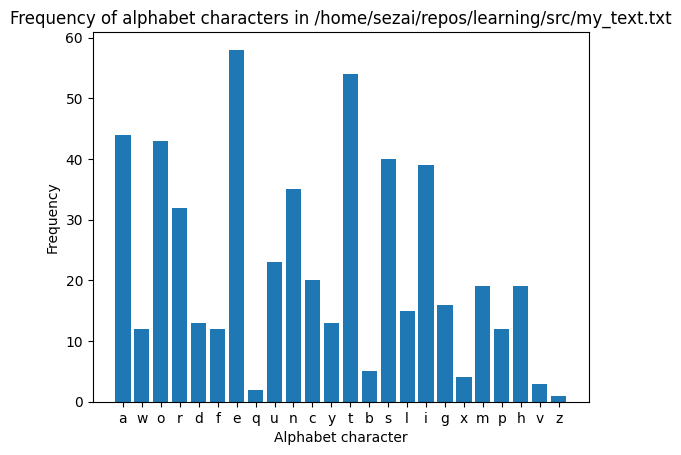

In [2]:
# P-2.34 
# Write a Python program that inputs a document and then outputs a bar-
# chart plot of the frequencies of each alphabet character that appears in
# that document.

import string
import matplotlib.pyplot as plt
from collections import Counter

def count_chars(filename = "/home/sezai/repos/learning/src/my_text.txt"):
    """Counts the frequency of each alphabet character in a file."""
    freq = {char: 0 for char in string.ascii_lowercase}
    with open(filename, 'r') as f:
        for line in f:
            for char in line.lower():
                if char in freq:
                    freq[char] += 1
    return freq

# This version of the function is much more efficient because it uses the Counter class to count
#  the frequency of each alphabet character in the file in a single pass. The Counter
#  constructor takes an iterable as input, which we generate using a generator
#  expression that iterates over each character in each line of the file, converts
#  it to lowercase, and filters out any characters that are not in the alphabet.

# The time complexity of this revised function is O(N * M), where N is the number
#  of lines in the file and M is the total number of characters in the file. However, it
#  should be faster than the original function because it uses the highly optimized Counter
#  class instead of manually updating a dictionary for each character.
def faster_count_chars(filename = "/home/sezai/repos/learning/src/my_text.txt"):
    """Counts the frequency of each alphabet character in a file."""
    with open(filename, 'r') as f:
        freq = Counter(char for line in f for char in line.lower() if char in string.ascii_lowercase)
    return freq

def draw():
    filename = input("Enter the filename: ")
    freq = faster_count_chars(filename)

    fig, ax = plt.subplots()
    
    ax.bar(freq.keys(), freq.values())
    ax.set_xlabel('Alphabet character')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of alphabet characters in ' + filename)
    plt.show()

draw()

In [5]:
# Learning about Collections

from collections import Counter 
    
# With sequence of items  
print(Counter(['B','B','A','B','C','A','B',
               'B','A','C']))
    
# with dictionary 
print(Counter({'A':3, 'B':5, 'C':2}))
    
# with keyword arguments 
print(Counter(A=3, B=5, C=2))

print("\n")


from collections import OrderedDict 
    
print("This is a Dict:\n") 
d = {} 
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4
    
for key, value in d.items(): 
    print(key, value) 
    
print("\nThis is an Ordered Dict:\n") 
od = OrderedDict() 
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
    
for key, value in od.items(): 
    print(key, value)


Counter({'B': 5, 'A': 3, 'C': 2})
Counter({'B': 5, 'A': 3, 'C': 2})
Counter({'B': 5, 'A': 3, 'C': 2})


This is a Dict:

a 1
b 2
c 3
d 4

This is an Ordered Dict:

a 1
b 2
c 3
d 4


In [6]:

# Learning about Collections

# Deletion test  
od = OrderedDict() 
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
    
print('Before Deleting')
for key, value in od.items(): 
    print(key, value) 
      
# deleting element
od.pop('a')
  
# Re-inserting the same
od['a'] = 1
  
print('\nAfter re-inserting')
for key, value in od.items(): 
    print(key, value)

Before Deleting
a 1
b 2
c 3
d 4

After re-inserting
b 2
c 3
d 4
a 1


In [10]:
# Learning about Collections

# defaults dict
# we get rid of the keyerror problem


from collections import defaultdict
  
  
# Function to return a default
# values for keys that is not
# present
def def_value():
    return "Not Present"
      
# Defining the dict
d = defaultdict(def_value)
d["a"] = 1
d["b"] = 2
  
print(d["a"])
print(d["b"])
print(d["c"])



# even better approach
# Python program to demonstrate
# default_factory argument of 
# defaultdict
  
print("\nlambda version!\n")

from collections import defaultdict
  
      
# Defining the dict and passing 
# lambda as default_factory argument
d = defaultdict(lambda: "Not Present")
d["a"] = 1
d["b"] = 2
  
print(d["a"])
print(d["b"])
print(d["c"])

1
2
Not Present

lambda version!

1
2
Not Present


In [13]:
# Learning about Collections

# Python program to demonstrate 
# ChainMap encapsulates many dictionaries into a single unit and returns a list of dictionaries.
     
from collections import ChainMap 
     
d1 = {'a': 1, 'b': 2}
d2 = {'c': 3, 'd': 4}
d3 = {'e': 5, 'f': 6}
  
# Defining the chainmap 
c = ChainMap(d1, d2, d3) 
     
print(c)

# Accessing Values using key name
print(f"Value of A key: {c['a']}")
  
# Accessing values using values()
# method
print(c.values())
  
# Accessing keys using keys()
# method
print(c.keys())

ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6})
Value of A key: 1
ValuesView(ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6}))
KeysView(ChainMap({'a': 1, 'b': 2}, {'c': 3, 'd': 4}, {'e': 5, 'f': 6}))


In [15]:
# Python code to demonstrate namedtuple()
    
from collections import namedtuple
    
# Declaring namedtuple() 
Student = namedtuple('Student',['name','age','DOB']) 
    
# Adding values 
S = Student('Nandini','19','2541997') 
    
# Access using index 
print ("The Student age using index is : ",end ="") 
print (S[1]) 
    
# Access using name  
print ("The Student name using keyname is : ",end ="") 
print (S.name)

# initializing iterable  
li = ['Manjeet', '19', '411997' ] 
    
# initializing dict 
di = { 'name' : "Nikhil", 'age' : 19 , 'DOB' : '1391997' } 
    
# using _make() to return namedtuple() 
print ("The namedtuple instance using iterable is  : ") 
print (Student._make(li)) 
    
# using _asdict() to return an OrderedDict() 
print ("The OrderedDict instance using namedtuple is  : ") 
print (S._asdict())

The Student age using index is : 19
The Student name using keyname is : Nandini
The namedtuple instance using iterable is  : 
Student(name='Manjeet', age='19', DOB='411997')
The OrderedDict instance using namedtuple is  : 
{'name': 'Nandini', 'age': '19', 'DOB': '2541997'}


In [16]:

from collections import deque
    
# Declaring a deque
queue = deque(['name','age','DOB'])     
print(queue)


# initializing deque 
de = deque([1,2,3]) 
    
# using append() to insert element at right end  
# inserts 4 at the end of deque 
de.append(4) 
    
# printing modified deque 
print ("The deque after appending at right is : ") 
print (de) 
    
# using appendleft() to insert element at left end  
# inserts 6 at the beginning of deque 
de.appendleft(6) 
    
# printing modified deque 
print ("The deque after appending at left is : ") 
print (de)



  
# using pop() to delete element from right end  
# deletes 4 from the right end of deque 
de.pop() 
    
# printing modified deque 
print ("The deque after deleting from right is : ") 
print (de) 
    
# using popleft() to delete element from left end  
# deletes 6 from the left end of deque 
de.popleft() 
    
# printing modified deque 
print ("The deque after deleting from left is : ") 
print (de)


deque(['name', 'age', 'DOB'])
The deque after appending at right is : 
deque([1, 2, 3, 4])
The deque after appending at left is : 
deque([6, 1, 2, 3, 4])
The deque after deleting from right is : 
deque([6, 1, 2, 3])
The deque after deleting from left is : 
deque([1, 2, 3])


In [23]:
# And you can basically override
# UserDict, UserList, UserString to make your custom classes

from collections import UserList

class MyList(UserList):

    def remove(self,):
        raise NotImplementedError (f"You cannot remove from {MyList.__name__}")

l = MyList([1,2,3,4])

print(l)


# Inserting to List" 
l.append(5) 
print("After Insertion") 
print(l) 

# l.remove()
# This will raise an exception

# Or a mutable string class ? 

from collections import UserString 
     
# Creating a Mutable String 
class Mystring(UserString): 
        
    # Function to append to 
    # string 
    def append(self, s): 
        self.data += s 
            
    # Function to remove from  
    # string 
    def remove(self, s): 
        self.data = self.data.replace(s, "") 
        
# Driver's code 
s1 = Mystring("Geeks") 
print("Original String:", s1.data) 
    
# Appending to string 
s1.append("s") 
print("String After Appending:", s1.data) 
    
# Removing from string 
s1.remove("e") 
print("String after Removing:", s1.data)

[1, 2, 3, 4]
After Insertion
[1, 2, 3, 4, 5]
Original String: Geeks
String After Appending: Geekss
String after Removing: Gkss


In [24]:
# P-2.35 
# Write a set of Python classes that can simulate an Internet application in
# which one party, Alice, is periodically creating a set of packets that she
# wants to send to Bob. An Internet process is continually checking if Alice
# has any packets to send, and if so, it delivers them to Bob’s computer, and
# Bob is periodically checking if his computer has a packet from Alice, and,
# if so, he reads and deletes it.

import time
import random
import copy

class Internet():
    def __init__(self, users):
        self._users = users

    def start_process(self):
        # check if queue is empty on server side periodically.
        # if its full, send it.
        
        for user in self._users:
                if user._role == 'server':
                    server_user = user
                if user._role == 'client':
                    client_user = user
        print(f"Server user in current network {server_user._username} and client user in current network {client_user._username}")
        
        while True:       
            print("Connection is alive..")
            # randomly generate a message from the server
            server_user._queue = [random.randint(0,9) for i in range(random.randint(1,9))] if random.random() < 0.5 else None

            if server_user._queue:
                server_user.send_packages(client_user)
                client_user.receive_packages(server_user)
            time.sleep(2)

class InternetUser():
    def __init__(self, username, role):
        self._username = username
        self._role = role
        self._queue = []
    
    def clear_queue(self):
        self._queue = []

    def send_packages(self,client_user):
        """Send packages from server to client
        This method meant to be run from the server"""
        if self._role != "server":
            raise Exception("This user cannot send packages")
        print(f"Sending message {self._queue} from {self._role}: {self._username}!")
        client_user._queue = copy.deepcopy(self._queue)

    def receive_packages(self,server_user) -> bool:
        """Received message from server to client. Delete the package after. 
        This method meant to be run from client"""
        
        if self._role != "client":
            raise Exception("This user cannot receive packages")
        
        print(f"Received message {self._queue}, now deleting it from {self._role}: {self._username}.")
        
        try:
            self.clear_queue()
            print(f"Queue isEmpty: {not bool(self._queue)}, empty as expected")
            return True 
        except Exception as e:
            print(f"Exception: {e}")
            print("A problem occurred, could not delete message")
            return False


bob = InternetUser(username="bob", role = "client")
alice = InternetUser(username="alice", role = "server")

the_internet = Internet(users=[bob,alice])
the_internet.start_process()

# TODO

Server user in current network alice and client user in current network bob
Connection is alive..
Sending message [1, 6, 3, 5, 0, 9, 0] from server: alice!
Received message [1, 6, 3, 5, 0, 9, 0], now deleting it from client: bob.
Queue isEmpty: True, empty as expected
Connection is alive..
Connection is alive..
Connection is alive..
Connection is alive..
Sending message [3, 9, 1, 9, 0, 4, 2] from server: alice!
Received message [3, 9, 1, 9, 0, 4, 2], now deleting it from client: bob.
Queue isEmpty: True, empty as expected
Connection is alive..
Connection is alive..
Connection is alive..
Sending message [5, 1, 3, 9, 0] from server: alice!
Received message [5, 1, 3, 9, 0], now deleting it from client: bob.
Queue isEmpty: True, empty as expected
Connection is alive..
Connection is alive..
Sending message [5, 4, 4, 0, 5, 2, 8] from server: alice!
Received message [5, 4, 4, 0, 5, 2, 8], now deleting it from client: bob.
Queue isEmpty: True, empty as expected
Connection is alive..
Sending me

KeyboardInterrupt: 

In [ ]:
# P-2.36 
# Write a Python program to simulate an ecosystem containing two types
# of creatures, bears and fish. The ecosystem consists of a river, which is
# modeled as a relatively large list. Each element of the list should be a
# Bear object, a Fish object, or None. In each time step, based on a random
# process, each animal either attempts to move into an adjacent list location
# or stay where it is. If two animals of the same type are about to collide in
# the same cell, then they stay where they are, but they create a new instance
# of that type of animal, which is placed in a random empty (i.e., previously
# None) location in the list. If a bear and a fish collide, however, then the
# fish dies (i.e., it disappears).


import random
import time
import copy

class River:

    def __init__(self,river_length):
        """Construct for river class, using the lenght of the river.
        """
        self._river_length = river_length
        self._river = [None] * river_length 
        print(f"Current state of the river is: \n {self._river}")

    def set_river(self,bears : list, fishes : list, is_start = False):
        
        bears_copy = copy.deepcopy(bears)
        fishes_copy = copy.deepcopy(fishes)
        # will be using queues
        dead_fish = []
        print(f"First state of fishes: {fishes}")

        # Let bears take position first.
        while bears_copy:
            random_index = random.randrange(self._river_length)
            # we don't want to stack bears
            if self._river[random_index] is not Bear:
                self._river[random.randrange(self._river_length)] = bears_copy.pop()
            else:
                continue
        if is_start:
            # Now fishes, no collisions at the start,
            while fishes_copy:
                # select random index, make sure its empty. Than put fish at the index.
                random_index = random.randrange(self._river_length)
                if self._river[random_index] is None:
                    self._river[random_index] = fishes_copy.pop()
                else:
                    continue
            print("River is set!")

        else:
            # Now fishes, no collisions at the start,
            while fishes_copy:
                # select random index, make sure its not a place with a Fish.
                random_index = random.randrange(self._river_length)
                if self._river[random_index] is not Fish:
                    if self._river[random_index] is Bear:
                        # RIP fish
                        dead_fish.append(fishes_copy.pop())
                    else:
                        self._river[random_index] = fishes_copy.pop()
                # continue until all fish moved
                else:
                    continue

            # NICE
            # Remove all the elements that occur in one list from another
            # NICE
            fishes = [x for x in fishes if x not in dead_fish]
            print(f"Last state of fishes: {fishes}")
            print("River state advanced!")
    
    def __str__(self):
        return ''.join(['B' if isinstance(x, Bear) else 'F' if isinstance(x, Fish) else '-' for x in self._river])

class Bear:
    def __init__(self) -> None:
        self._claw_type = "Big" if random.random() < 0.5 else "Small"
        self._bear_type = ["American black bear", "Brown bear", "Kodiak Bear"][random.randrange(0,3)]

    def __str__(self):
        return 'B'

class Fish:
    def __init__(self):
        self._speed = "Fast" if random.random() < 0.5 else "slow"
        self._color = ["Black", "Yellow", "Green", "Blue"][random.randrange(0,4)]

    def __str__(self):
        return 'F'

nile = River(river_length=20)

bears = [Bear() for i in range(random.randint(1,2))]
fishes = [Fish() for i in range(random.randint(2,3))]

nile.set_river(bears, fishes, is_start= True)
print(f"Current positions in the river are: {nile}")

while True:
    nile.set_river(bears, fishes, is_start= False)
    print(f"After the movements, positions in the river are: {nile}")
    # print(f"Number of fishes left:{}")
    time.sleep(3)


# TODO

In [25]:
# LLM Results = CHatGPT

import random
import time

class River:
    def __init__(self, river_length):
        self._river_length = river_length
        self._river = [None] * river_length 

    def set_river(self, bears, fishes, is_start=False):
        # place bears first
        for bear in bears:
            while True:
                idx = random.randrange(self._river_length)
                if self._river[idx] is None:
                    self._river[idx] = bear
                    break

        # place fishes next
        dead_fish = []
        for fish in fishes:
            while True:
                idx = random.randrange(self._river_length)
                if self._river[idx] is None:
                    self._river[idx] = fish
                    break
                elif isinstance(self._river[idx], Fish):
                    continue  # no collisions between fishes
                elif isinstance(self._river[idx], Bear):
                    dead_fish.append(fish)
                    break  # fish dies when it collides with a bear

        # remove dead fishes from the list
        for fish in dead_fish:
            fishes.remove(fish)

    def move_animal(self, idx):
        # There is an animal at this index for sure.
        animal = self._river[idx]

        # move animal to an adjacent location
        offset = random.choice([-1, 1])
        new_idx = idx + offset
        if new_idx < 0 or new_idx >= self._river_length:
            return  # animal stays in place
        # move to an empty location
        if self._river[new_idx] is None:
            self._river[new_idx] = animal
            self._river[idx] = None
        elif isinstance(self._river[new_idx], type(animal)):
            # create a new instance of the animal type in an empty location
            while True:
                new_idx = random.randrange(self._river_length)
                if self._river[new_idx] is None:
                    self._river[new_idx] = type(animal)()
                    break
        elif isinstance(self._river[new_idx], Fish) and isinstance(animal, Bear):
            # bear eats fish and moves to its location
            self._river[new_idx] = animal
            self._river[idx] = None

    def advance(self):
        for idx in range(self._river_length):
            animal = self._river[idx]
            if animal is not None:
                self.move_animal(idx)

    def __str__(self):
        return ''.join(['B' if isinstance(x, Bear) else 'F' if isinstance(x, Fish) else '-' for x in self._river])

class Bear:
    def __init__(self):
        self._claw_type = "Big" if random.random() < 0.5 else "Small"
        self._bear_type = random.choice(["American black bear", "Brown bear", "Kodiak bear"])

    def __str__(self):
        return 'B'

class Fish:
    def __init__(self):
        self._speed = "Fast" if random.random() < 0.5 else "Slow"
        self._color = random.choice(["Black", "Yellow", "Green", "Blue"])

    def __str__(self):
        return 'F'

river = River(20)
bears = [Bear() for _ in range(random.randint(1, 2))]
fishes = [Fish() for _ in range(random.randint(2, 3))]
river.set_river(bears, fishes, is_start=True)

while True:
    river.advance()
    print(river)
    if not any(isinstance(x, Fish) for x in river._river):
        print("All the fish are gone")
        break
    time.sleep(2)
    


-----B-----B------F-
-----B----B--------F
----B-----B-------F-
---B-----B-------F--
------B-B-------F---
-----B-B-------F----
-----B--B-------F---
----B---B------F----
---B---B------F-----
--B---B--------F----
-B---B--------F-----
B---B--------F------
B---B--------F------
-B--B--------F------
--BB--------F-------
-BB--------------F--
B--B------------F---
B-B------------F----
B-B-----------F-----
B-----B------F------
-B-----B-----F------
-----BB-----F-------
----B--B---F--------


KeyboardInterrupt: 

In [ ]:
# P-2.37 
# Write a simulator, as in the previous project, but add a Boolean gender 
# field and a floating-point strength field to each animal, using an Animal
# class as a base class. If two animals of the same type try to collide, then
# they only create a new instance of that type of animal if they are of different
#  genders. Otherwise, if two animals of the same type and gender try to
# collide, then only the one of larger strength survives.


# Kinda done with any river problems for now.

In [1]:
# P-2.38
#  Write a Python program that simulates a system that supports the functions
#  of an e-book reader. You should include methods for users of your
# system to “buy” new books, view their list of purchased books, and read
# their purchased books. Your system should use actual books, which have
# expired copyrights and are available on the Internet, to populate your set
# of available books for users of your system to “purchase” and read.

class Book:
    def __init__(self, title, author, content):
        self.title = title
        self.author = author
        self.content = content

class EBookReader:
    def __init__(self):
        self.books = {}

    def buy_book(self, title, author, url):
        content = self._download_book(url)
        book = Book(title, author, content)
        # Adding the book to the books dictionary, using the (title, author) tuple as the key.
        self.books[(title, author)] = book

    def view_library(self):
        """ iterates over the purchased books in the books dictionary 
        and prints out their titles and authors in a numbered list."""
        for i, book in enumerate(self.books.values()):
            print(f'{i+1}. {book.title} by {book.author}')

    def read_book(self, title, author):
        """The read_book method takes in the title and author of a book, looks
        up the corresponding Book instance in the books dictionary, and
        prints out the title, author, and content of the book if it is found.
        If the book is not found, it prints an error message.
        """
        book = self.books.get((title, author))
        if book:
            print(f'Reading {book.title} by {book.author}')
            print(book.content)
        else:
            print(f'{title} by {author} not found in library')

    def _download_book(self, url):
        # Placeholder method to download book content from URL
        return f'Content of {url}'


reader = EBookReader()
reader.buy_book('Pride and Prejudice', 'Jane Austen', 'http://www.gutenberg.org/ebooks/1342.txt.utf-8')
reader.buy_book('To Kill a Mockingbird', 'Harper Lee', 'http://www.gutenberg.org/ebooks/27827.txt.utf-8')

reader.view_library()
# Output:
# 1. Pride and Prejudice by Jane Austen
# 2. To Kill a Mockingbird by Harper Lee

reader.read_book('Pride and Prejudice', 'Jane Austen')
# Output:
# Reading Pride and Prejudice by Jane Austen
# Content of http://www.gutenberg.org/ebooks/1342.txt.utf-8


1. Pride and Prejudice by Jane Austen
2. To Kill a Mockingbird by Harper Lee
Reading Pride and Prejudice by Jane Austen
Content of http://www.gutenberg.org/ebooks/1342.txt.utf-8


In [9]:
# P-2.39

#  Develop an inheritance hierarchy based upon a Polygon class that has
# abstract methods area( ) and perimeter( ). Implement classes Triangle,
# Quadrilateral, Pentagon, Hexagon, and Octagon that extend this base
# class, with the obvious meanings for the area( ) and perimeter( ) methods.
# Also implement classes, IsoscelesTriangle, EquilateralTriangle, Rectangle,
#  and Square, that have the appropriate inheritance relationships. 
# 
# Finally, write a simple program that allows users to create polygons of the
# various types and input their geometric dimensions, and the program then
# outputs their area and perimeter. For extra effort, allow users to input
# polygons by specifying their vertex coordinates and be able to test if two
# such polygons are similar.


import math

class Polygon:
    """A base class for all possible polygons.
    """
    def __init__(self, sides):
        self.sides = sides

    def perimeter(self):
        return sum(self.sides)

    def area(self):
        raise NotImplementedError("Subclass must implement abstract method")

class Triangle(Polygon):
    def __init__(self, a, b, c):
        if a + b <= c or b + c <= a or a + c <= b:
            raise ValueError ("These values cannot make a valid Triangle")
        super().__init__([a, b, c])

    def area(self):
        s = self.perimeter() / 2
        return math.sqrt(s * (s - self.sides[0]) * (s - self.sides[1]) * (s - self.sides[2]))

class Quadrilateral(Polygon):
    def __init__(self, a, b, c, d):
        super().__init__([a, b, c, d])

class Rectangle(Quadrilateral):
    def __init__(self, length, width):
        super().__init__([length, width, length, width])

    def area(self):
        return self.sides[0] * self.sides[1]

class Square(Rectangle):
    """Area is the same as Rectangle"""
    def __init__(self, side):
        super().__init__(side, side)

class Pentagon(Polygon):
    def __init__(self, a, b, c, d, e):
        super().__init__([a, b, c, d, e])

    def area(self):
        # Area = 1/2 × perimeter of the pentagon × apothem.
        return 0.25 * math.sqrt(5 * (5 + 2 * math.sqrt(5))) * (self.perimeter() ** 2)

class Hexagon(Polygon):
    def __init__(self, a, b, c, d, e, f):
        super().__init__([a, b, c, d, e, f])

    def area(self):
        return (3 * math.sqrt(3) * (self.sides[0] ** 2)) / 2

class IsoscelesTriangle(Triangle):
    """It has two of the same sides"""
    def __init__(self, a, b):
        super().__init__(a, b, b)

class EquilateralTriangle(Triangle):
    """All equal sides"""
    def __init__(self, a):
        super().__init__(a, a, a)
        
def create_polygon():
    while True:
        n = int(input("Enter the number of sides (3-8): "))
        if n < 3 or n > 8:
            print("Invalid number of sides")
        else:
            break

    sides = []
    for i in range(n):
        side = float(input(f"Enter side {i+1}: "))
        sides.append(side)

    if n == 3:
        # we can check the side equality with sets
        if len(set(sides)) == 1:
            print("Thats a EquilateralTriangle")
            return EquilateralTriangle(sides[0])
        elif len(set(sides)) == 2:
            print("That will be a IsoscelesTriangle")
            return IsoscelesTriangle(sides[0], sides[1])
        else:
            return Triangle(sides[0], sides[1], sides[2])
    elif n == 4:
        if len(set(sides)) == 1:
            print("Thats a special Rectangle, its a Square")
            return Square(sides[0])
        else:
            return Rectangle(sides[0], sides[1])
    elif n == 5:
        return Pentagon(*sides)
    elif n == 6:
        return Hexagon(*sides)
    else:
        return Polygon(sides)

polygon = create_polygon()
print(f"Area: {polygon.area()}")
print(f"Perimeter: {polygon.perimeter()}")



That will be a IsoscelesTriangle
Area: 5.562148865321747
Perimeter: 11.0
